Для начала работы программы вам необходимо загрузить файл с входными данными в следующем виде:

1. $x_0$ Начальная координата 
2. $t_1$ Время расчета 
3. $t_2$ Параметр дискретизации 
4. $k$ Коэффициент жесткости пружины в Н/м 
5. $m$ Масса груза в кг 
6. $A$ Амплитуда гармонической силы в Н 
7. $n$ Целочисленный коэффициент - отношение амплитуд двух гармонических сил 
8. $\omega$ Частота внешних сил  в 1/с

### Примечание: Используйте точку, чтобы отделить дробную часть! 

Пример внешнего вида файла вы можете увидеть ниже:

<img src="sample.png">

Импортируем библиотеки, которые понадобятся в процессе работы программы

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Считываем данные из файла и сохраняем их в виде словаря для удобности обращения. 

In [186]:
data_list = []
data_dict = {}
with open("enter_data.txt") as f:
    for line in f:
        data_list.append([x for x in line.split()])
for i in range(1, len(data_list), 2):
    data_dict[int(i / 2 + 1)] = float(data_list[i][0])

In [187]:
data_dict

{1: -5.0, 2: 10.0, 3: 0.01, 4: 32.0, 5: 2.0, 6: 5.0, 7: 3.0, 8: 4.0}

In [197]:
data_dict_in

{1: -5.0, 2: 10.0, 3: 0.01, 4: 50.0, 5: 2.0, 6: 3.0, 7: 1.0, 8: 10.0}

Заведем массивы для координат, скоростей и времени. А затем будем добавлять итерационно изменение координат и скоростей по схеме, описанной раннее в отчете.   

In [188]:
a_array = np.array([0])
v_array = np.array([0])
x_array = np.array([data_dict[1]])
t_array = np.array([0])

t = 0
for i in range(int(data_dict[2] // data_dict[3]) + 1):
    a_i = (-data_dict[4] * x_array[i]  + data_dict[6] * np.cos(data_dict[8] * t) + data_dict[6] * data_dict[7] \
                                            * np.sin(data_dict[8] * t) ) / data_dict[5]
    v_i = v_array[i] + a_i * data_dict[3]
    x_i = x_array[i] + v_i * data_dict[3]
    a_array = np.append(a_array, a_i)
    v_array = np.append(v_array, v_i)
    x_array = np.append(x_array, x_i)
    t += data_dict[3]
    t_array = np.append(t_array, t)

Отобразим на графиках поведение 

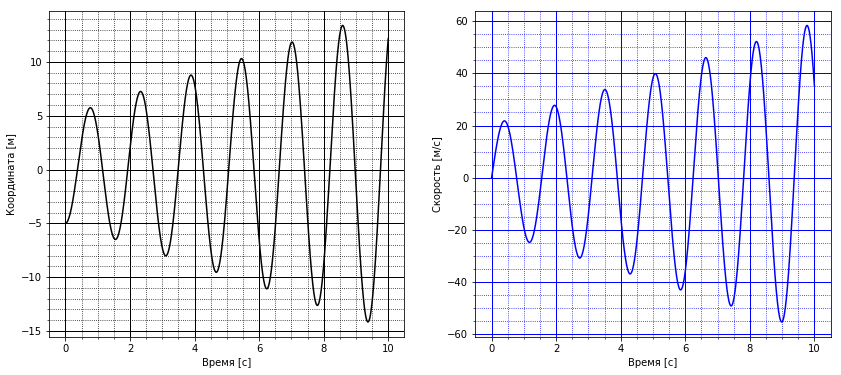

In [195]:
%matplotlib inline


fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 2, 1)
_ = plt.plot(t_array, x_array  , 'k')
ax.set_xlabel('Время [с]')
ax.set_ylabel('Координата [м]')
ax.minorticks_on()
ax.grid(which='major',
        color = 'k', 
        linewidth = 1)
ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')


ax_1 = fig.add_subplot(1, 2, 2)
_ = plt.plot(t_array, v_array, 'b')
ax_1.set_xlabel('Время [с]')
ax_1.set_ylabel('Скорость [м/с]')
ax_1.minorticks_on()
ax_1.grid(which='major',
        color = 'b', 
        linewidth = 1)
ax_1.grid(which='minor', 
        color = 'b', 
        linestyle = ':')
plt.show()
#Сохраним наш график в .pdf формате
plt.savefig('output_pic.pdf')

Сохраним данные в таблицу формата .xlsx

In [190]:
d = {'t':t_array, 'x':x_array, 'v': v_array}
df = pd.DataFrame(d)
df.to_excel("output_data.xlsx")

Добавим теперь возможность выбирать параметры не из файла, а прямо из программы.

In [201]:
from IPython.display import display
from ipywidgets import FloatSlider

Slider_for_x = FloatSlider(
    value=-5., # Первоначальное значение
    min=-10,     # Минимум
    max=10.0,  # Максимум
    step=0.01,  # Шаг изменения
    description='Начальная координата:',
    continuous_update=True,  # True - событие observe возникает для каждого шага при изменении значения
    orientation='horizontal'  # Горизонтальное или вертикальное расположение
)

Slider_for_t_1 = FloatSlider(
    value=10, # Первоначальное значение
    min=0,     # Минимум
    max=100.0,  # Максимум
    step=0.01,  # Шаг изменения
    description='Время расчета:',
    continuous_update=True,  # True - событие observe возникает для каждого шага при изменении значения
    orientation='horizontal'  # Горизонтальное или вертикальное расположение
)

Slider_for_t_2 = FloatSlider(
    value=0.01, # Первоначальное значение
    min=0,     # Минимум
    max=1.0,  # Максимум
    step=0.01,  # Шаг изменения
    description='Параметр дискретизации:',
    continuous_update=True,  # True - событие observe возникает для каждого шага при изменении значения
    orientation='horizontal'  # Горизонтальное или вертикальное расположение
)

Slider_for_k = FloatSlider(
    value=50, # Первоначальное значение
    min=0,     # Минимум
    max=1000.0,  # Максимум
    step=1.,  # Шаг изменения
    description='Жесткость пружины:',
    continuous_update=True,  # True - событие observe возникает для каждого шага при изменении значения
    orientation='horizontal'  # Горизонтальное или вертикальное расположение
)

Slider_for_m = FloatSlider(
    value=2, # Первоначальное значение
    min=0,     # Минимум
    max=20.0,  # Максимум
    step=0.05,  # Шаг изменения
    description='Масса груза:',
    continuous_update=True,  # True - событие observe возникает для каждого шага при изменении значения
    orientation='horizontal'  # Горизонтальное или вертикальное расположение
)

Slider_for_A = FloatSlider(
    value=3, # Первоначальное значение
    min=0,     # Минимум
    max=100.0,  # Максимум
    step=1.,  # Шаг изменения
    description='Амплитуда внешней силы:',
    continuous_update=True,  # True - событие observe возникает для каждого шага при изменении значения
    orientation='horizontal'  # Горизонтальное или вертикальное расположение
)


Slider_for_n = FloatSlider(
    value=1, # Первоначальное значение
    min=0,     # Минимум
    max=100.0,  # Максимум
    step=1.,  # Шаг изменения
    description='Отношение амплитуд двух сил:',
    continuous_update=True,  # True - событие observe возникает для каждого шага при изменении значения
    orientation='horizontal'  # Горизонтальное или вертикальное расположение
)


Slider_for_omega = FloatSlider(
    value=10, # Первоначальное значение
    min=0,     # Минимум
    max=1000.0,  # Максимум
    step=1.,  # Шаг изменения
    description='Частота внешней силы:',
    continuous_update=True,  # True - событие observe возникает для каждого шага при изменении значения
    orientation='horizontal'  # Горизонтальное или вертикальное расположение
)


display(Slider_for_x, Slider_for_t_1, Slider_for_t_2, Slider_for_k, Slider_for_m, Slider_for_A, Slider_for_n, Slider_for_omega)

In [207]:
list_of_names = [Slider_for_x, Slider_for_t_1, Slider_for_t_2, Slider_for_k, \
                 Slider_for_m, Slider_for_A, Slider_for_n, Slider_for_omega]
data_dict_in = {}
for i in range(8):
    data_dict_in[i+1] = float(list_of_names[i].value)


In [208]:
a_array_in = np.array([0.])
v_array_in = np.array([0.])
x_array_in = np.array([data_dict_in[1]])
t_array_in = np.array([0.])

t = 0.
for i in range(int(data_dict_in[2] // data_dict_in[3]) + 1):
    a_i = (-data_dict_in[4] * x_array_in[i]  + data_dict_in[6] * np.cos(data_dict_in[8] * t) + data_dict_in[6] * data_dict_in[7] \
                                            * np.sin(data_dict_in[8] * t) ) / data_dict_in[5]
    v_i = v_array_in[i] + a_i * data_dict_in[3]
    x_i = x_array_in[i] + v_i * data_dict_in[3]
    a_array_in = np.append(a_array_in, a_i)
    v_array_in = np.append(v_array_in, v_i)
    x_array_in = np.append(x_array_in, x_i)
    t += data_dict_in[3]
    t_array_in = np.append(t_array_in, t)


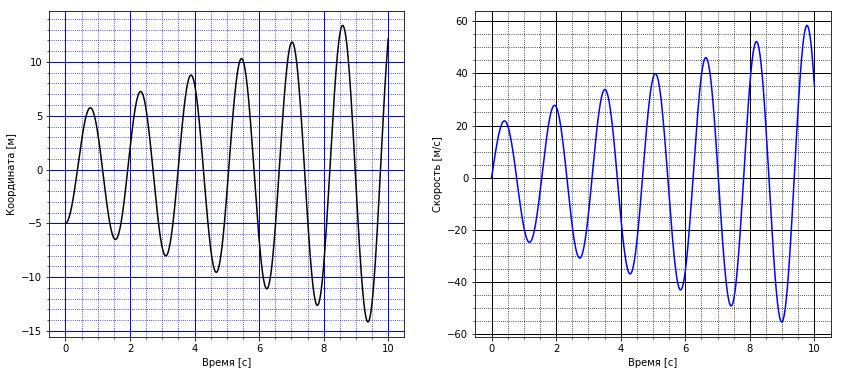

In [209]:
%matplotlib inline


fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 2, 1)
_ = plt.plot(t_array_in, x_array_in  , 'k')
ax.set_xlabel('Время [с]')
ax.set_ylabel('Координата [м]')
ax.minorticks_on()
ax.grid(which='major',
        color = 'b', 
        linewidth = 1)
ax.grid(which='minor', 
        color = 'b', 
        linestyle = ':')


ax_1 = fig.add_subplot(1, 2, 2)
_ = plt.plot(t_array_in, v_array_in, 'b')
ax_1.set_xlabel('Время [с]')
ax_1.set_ylabel('Скорость [м/с]')
ax_1.minorticks_on()
ax_1.grid(which='major',
        color = 'k', 
        linewidth = 1)
ax_1.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
plt.show()
#Сохраним наш график в .pdf формате
plt.savefig('output_pic.pdf')

In [191]:
d = {'t':t_array_in, 'x':x_array_in, 'v': v_array_in}
df = pd.DataFrame(d)
df.to_excel("output_data.xlsx")